## `Pastikan klik 'File > Save a copy in Drive' sebelum memulai pengerjaan`

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tseries.offsets import BDay

#Dataset

Data yang digunakan adalah data yang berasal dari Tokopedia (***bukan data sesungguhnya***). Mengenai penjelasan dataset adalah sebagai berikut:

|variable                       |class     |description |
|:------------------------------|:---------|:-----------|
**order_detail:**
id 			|object| angka unik dari order / id_order
customer_id 		|object|angka unik dari pelanggan
order_date 		|object| tanggal saat dilakukan transaksi
sku_id 			|object| angka unik dari produk (sku adalah stock keeping unit)
price			|int64| harga yang tertera pada tagging harga
qty_ordered 		|int64| jumlah barang yang dibeli oleh pelanggan
before_discount	|float64| nilai harga total dari produk (price * qty_ordered)
discount_amount	|float64| nilai diskon product total
after_discount		|float64| nilai harga total produk ketika sudah dikurangi dengan diskon
is_gross 		|int64| menunjukkan pelanggan belum membayar pesanan
is_valid		|int64| menunjukkan pelanggan sudah melakukan pembayaran
is_net			|int64| menunjukkan transaksi sudah selesai
payment_id 		|int64| angka unik dari metode pembayaran
||
**sku_detail:**
id |object| angka unik dari produk (dapat digunakan untuk key saat join)
sku_name 		|object| nama dari produk
base_price		|float64| harga barang yang tertera pada tagging harga / price
cogs 			|int64| cost of goods sold / total biaya untuk menjual 1 produk
category		|object| kategori produk
||
**customer_detail:**
id 			|object| angka unik dari pelanggan
registered_date	|object| tanggal pelanggan mulai mendaftarkan diri sebagai anggota
||
**payment_detail:**
id			|int64| angka unik dari metode pembayaran
payment_method	|object| metode pembayaran yang digunakan


In [ ]:
#Sumber data yang digunakan
path_od = "https://raw.githubusercontent.com/dataskillsboost/FinalProjectDA11/main/order_detail.csv"
path_pd = "https://raw.githubusercontent.com/dataskillsboost/FinalProjectDA11/main/payment_detail.csv"
path_cd = "https://raw.githubusercontent.com/dataskillsboost/FinalProjectDA11/main/customer_detail.csv"
path_sd = "https://raw.githubusercontent.com/dataskillsboost/FinalProjectDA11/main/sku_detail.csv"
df_od = pd.read_csv(path_od)
df_pd = pd.read_csv(path_pd)
df_cd = pd.read_csv(path_cd)
df_sd = pd.read_csv(path_sd)

In [ ]:
#Mengampilkan 5 baris pertama
df_od.head()

,id,customer_id,order_date,sku_id,price,qty_ordered,before_discount,discount_amount,after_discount,is_gross,is_valid,is_net,payment_id
0,ODR9939707760w,C713589L,2021-11-19,P858068,26100,200,5220000.0,2610000.00,2610000.00,1,1,0,5
1,ODR7448356649d,C551551L,2021-11-19,P886455,1971942,5,9859710.0,2464927.50,7394782.50,1,0,0,5
2,ODR4011281866z,C685596L,2021-11-25,P678648,7482000,1,7482000.0,2065344.62,5416655.38,1,0,0,4
3,ODR3378927994s,C830683L,2021-11-22,P540013,3593680,1,3593680.0,1455440.40,2138239.60,1,1,1,5
4,ODR4904430099k,C191766L,2021-11-21,P491032,4413220,1,4413220.0,1059172.80,3354047.20,1,1,1,4


In [ ]:
#Mengampilkan 5 baris pertama
df_pd.head()

,id,payment_method
0,1,cod
1,2,jazzvoucher
2,3,customercredit
3,4,Payaxis
4,5,jazzwallet


In [ ]:
#Mengampilkan 5 baris pertama
df_cd.head()

,id,registered_date
0,C996508L,2021-07-10
1,C180415L,2021-07-18
2,C535451L,2021-07-23
3,C177843L,2021-07-12
4,C951682L,2021-07-27


In [ ]:
#Mengampilkan 5 baris pertama
df_sd.head()

,id,sku_name,base_price,cogs,category
0,P798444,AT-FSM-35,57631.70,46052,Kids & Baby
1,P938347,AYS_Haier-18HNF,3931789.26,3499256,Appliances
2,P826364,Atalian _DV206A-Brown-41,324597.00,243426,Men Fashion
3,P467533,Darul_Sakoon_Food_Bundle,2870.42,2378,Superstore
4,P229955,HP_15AY-15-Ay072NIA-ci3,2265625.00,1631250,Computing


In [ ]:
#Menjalankan SQL di Colab
from sqlite3 import connect
conn = connect(':memory:')
df_od.to_sql('order_detail',conn, index=False, if_exists='replace')
df_pd.to_sql('payment_detail', conn, index=False, if_exists='replace')
df_sd.to_sql('sku_detail', conn, index=False, if_exists='replace')
df_cd.to_sql('customer_detail', conn, index=False, if_exists='replace')

3998

In [ ]:
#Query SQL untuk menggabungkan data
df = pd.read_sql("""
SELECT
    order_detail.*,
    payment_detail.payment_method,
    sku_detail.sku_name,
    sku_detail.base_price,
    sku_detail.cogs,
    sku_detail.category,
    customer_detail.registered_date
FROM order_detail
LEFT JOIN payment_detail
    on payment_detail.id = order_detail.payment_id
LEFT JOIN sku_detail
    on sku_detail.id = order_detail.sku_id
LEFT JOIN customer_detail
    on customer_detail.id = order_detail.customer_id
""", conn)

In [ ]:
#Mengampilkan 5 baris pertama
df.head()

,id,customer_id,order_date,sku_id,price,qty_ordered,before_discount,discount_amount,after_discount,is_gross,is_valid,is_net,payment_id,payment_method,sku_name,base_price,cogs,category,registered_date
0,ODR9939707760w,C713589L,2021-11-19,P858068,26100,200,5220000.0,2610000.00,2610000.00,1,1,0,5,jazzwallet,RB_Dettol Germ Busting Kit-bf,26100.0,18270,Others,2021-07-07
1,ODR7448356649d,C551551L,2021-11-19,P886455,1971942,5,9859710.0,2464927.50,7394782.50,1,0,0,5,jazzwallet,PS4_Slim-500GB,1971942.0,1321182,Entertainment,2021-11-20
2,ODR4011281866z,C685596L,2021-11-25,P678648,7482000,1,7482000.0,2065344.62,5416655.38,1,0,0,4,Payaxis,Changhong Ruba 55 Inches UD55D6000i Ultra HD T...,7482000.0,5162580,Entertainment,2021-11-19
3,ODR3378927994s,C830683L,2021-11-22,P540013,3593680,1,3593680.0,1455440.40,2138239.60,1,1,1,5,jazzwallet,dawlance_Inverter 30,3593680.0,3054628,Appliances,2021-11-03
4,ODR4904430099k,C191766L,2021-11-21,P491032,4413220,1,4413220.0,1059172.80,3354047.20,1,1,1,4,Payaxis,Dawlance_Inverter-45 2.0 ton,4413220.0,3177472,Appliances,2021-07-05


In [ ]:
#Menampikan tipe data tiap kolom
df.dtypes

,0
id,object
customer_id,object
order_date,object
sku_id,object
price,int64
qty_ordered,int64
before_discount,float64
discount_amount,float64
after_discount,float64
is_gross,int64


In [ ]:
#Mengubah tipe data agar mudah dilakukan pengolahan data
df = df.astype({"before_discount":'int', "discount_amount":'int', "after_discount":'int',"base_price":'int'})
df.dtypes

,0
id,object
customer_id,object
order_date,object
sku_id,object
price,int64
qty_ordered,int64
before_discount,int64
discount_amount,int64
after_discount,int64
is_gross,int64


In [ ]:
#Mengubah tipe kolom Date menjadi Datetime
df['order_date']= pd.to_datetime(df['order_date'])
df['registered_date']= pd.to_datetime(df['registered_date'])
df.dtypes


,0
id,object
customer_id,object
order_date,datetime64[ns]
sku_id,object
price,int64
qty_ordered,int64
before_discount,int64
discount_amount,int64
after_discount,int64
is_gross,int64


In [ ]:
print(df.isnull().sum().sum())


0


## `No 1`
**Dear Data Analyst**,
<br></br>
Akhir tahun ini, perusahaan akan memberikan hadiah bagi pelanggan yang memenangkan kompetisi **Festival Akhir Tahun**. Tim Marketing membutuhkan bantuan untuk menentukan perkiraan hadiah yang akan diberikan pada pemenang kompetisi nantinya. Hadiah tersebut akan diambil dari **TOP 5 Produk** dari Kategori **Mobiles & Tablets** selama tahun 2022, dengan jumlah kuantitas penjualan (valid = 1) paling tinggi.

Mohon bantuan, untuk mengirimkan data tersebut sebelum akhir bulan ini ke Tim Marketing. Atas bantuan yang diberikan, kami mengucapkan terima kasih.
<br></br>
Regards

**Tim Marketing**

<details><summary>Klik di sini untuk tips</summary>


```python
1. Memfilter data dengan valid = 1
2. Memfilter data dengan Category = Mobiles & Tablets
3. Memfilter data pada transaksi selama 2022
4. Gunakan groupby berdasarkan sku_name
5. Gunakan sort_values untuk mengurutkan data
6. Gunakan head untuk menampilkan top 5 produk


```



</details>

## `Jawaban No 1`

In [ ]:
# Filter data yang valid terlebih dahulu
valid_data = df.loc[df["is_valid"] == 1].copy()

In [ ]:
# Filter kategori dan tahun 2022
data1 = valid_data.loc[
    (valid_data["category"] == "Mobiles & Tablets") &
    (valid_data["order_date"].dt.year == 2022)
]

In [ ]:
# Tulis kode Anda di bawah ini. Dapat menggunakan lebih dari 1 blok kode
# Mengelompokkan dan menghitung total pesanan per SKU
data1 = (
    data1.groupby("sku_name")["qty_ordered"]
    .sum()
    .reset_index(name="qty_2022")
    .sort_values("qty_2022", ascending=False)
)


In [ ]:
# Menampilkan 5 hasil teratas
data1.head()

,sku_name,qty_2022
1,IDROID_BALRX7-Gold,1000
2,IDROID_BALRX7-Jet black,31
3,Infinix Hot 4-Gold,15
43,samsung_Grand Prime Plus-Black,11
34,infinix_Zero 4-Grey,10


<ipython-input-18-8d9a70943595>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


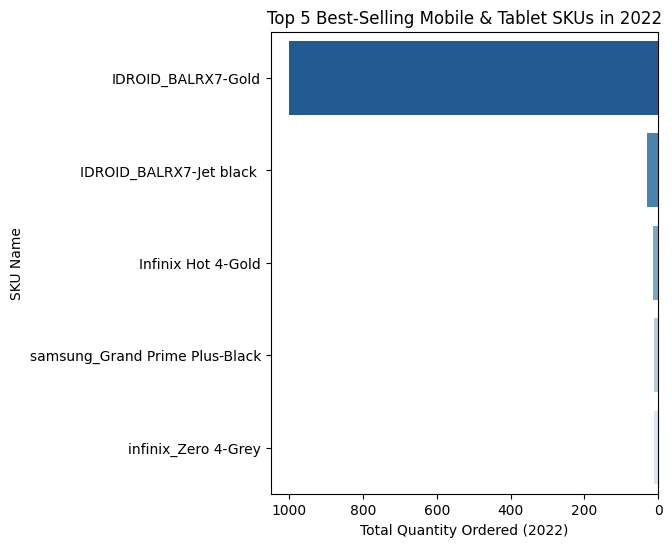

In [ ]:

# Membuat horizontal bar chart
import matplotlib.pyplot as plt
import seaborn as sns

# Pilih 10 SKU teratas
top_5_sku = data1.head(5)

# Plot horizontal bar chart
plt.figure(figsize=(5, 6))
sns.barplot(
    data=top_5_sku,
    x="qty_2022",
    y="sku_name",
    palette="Blues_r"
)

# Menambahkan label dan judul
plt.xlabel("Total Quantity Ordered (2022)")
plt.ylabel("SKU Name")
plt.title("Top 5 Best-Selling Mobile & Tablet SKUs in 2022")
plt.gca().invert_xaxis()  # Membalikkan sumbu Y agar yang terbesar di atas
plt.show()


## `No 2`
**Dear Data Analyst**,
<br></br>
Menindaklanjuti meeting gabungan Tim Werehouse dan Tim Marketing, kami menemukan bahwa ketersediaan stock produk dengan Kategori Others pada akhir 2022 kemarin masih banyak.
1. Kami mohon bantuan untuk melakukan pengecekan data penjualan kategori tersebut dengan tahun 2021 secara kuantitas penjualan. Dugaan sementara kami, telah terjadi penurunan kuantitas penjualan pada 2022 dibandingkan 2021. (Mohon juga menampilkan data ke-15 kategori)
<br></br>
2. Apabila memang terjadi penurunan kuantitas penjualan pada kategori Others, kami mohon bantuan untuk menyediakan data TOP 20 nama produk yang mengalami penurunan paling tinggi pada 2022 jika dibanding dengan 2021. Hal ini kami gunakan sebagai bahan diskusi pada meeting selanjutnya.  

Mohon bantuan untuk mengirimkan data tersebut paling lambat 4 hari dari hari ini. Atas bantuan yang diberikan, kami mengucapkan terima kasih.
<br></br>
Regards

**Tim Werehouse**

<details><summary>Klik di sini untuk tips</summary>


```python
1. Memfilter data dengan valid = 1
2. Memfilter data pada transaksi selama 2021
3. Memfilter data pada transaksi selama 2022
4. Gunakan groupby berdasarkan sku_name masing-masing tahun
5. Menggabungkan kedua data dengan merge
6. Lakukan pengurangan kolom qty 2022 dengan qty 2021


```



</details>

## `Jawaban No 2.1`

In [ ]:
#Memfilter Data Valid
valid_data = df[df["is_valid"] == 1]


In [ ]:
#Mengelompokkan Data Tahun 2021
data2_21 = valid_data[valid_data["order_date"].dt.year == 2021].groupby("category")["qty_ordered"].sum().reset_index()


In [ ]:
#Mengelompokkan Data Tahun 2022
data2_22 = valid_data[valid_data["order_date"].dt.year == 2022].groupby("category")["qty_ordered"].sum().reset_index()


In [ ]:
#Menggabungkan Data Tahun 2021 dan 2022
data2_merge = pd.merge(data2_21, data2_22, on="category", how="outer", suffixes=("_2021", "_2022")).fillna(0)


In [ ]:
#Menghitung Selisih Jumlah Pesanan
data2_merge["qty_diff"] = data2_merge["qty_ordered_2022"] - data2_merge["qty_ordered_2021"]


In [ ]:
#Mengurutkan Berdasarkan Perubahan Pesanan
data2_merge.sort_values("qty_diff", ascending=True)


,category,qty_ordered_2021,qty_ordered_2022,qty_diff
10,Others,426,263,-163
12,Soghaat,759,612,-147
8,Men Fashion,237,175,-62
1,Beauty & Grooming,168,153,-15
0,Appliances,124,148,24
2,Books,171,195,24
5,Health & Sports,173,200,27
3,Computing,109,153,44
11,School & Education,184,237,53
6,Home & Living,193,250,57


<ipython-input-25-3f0991f8d06f>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


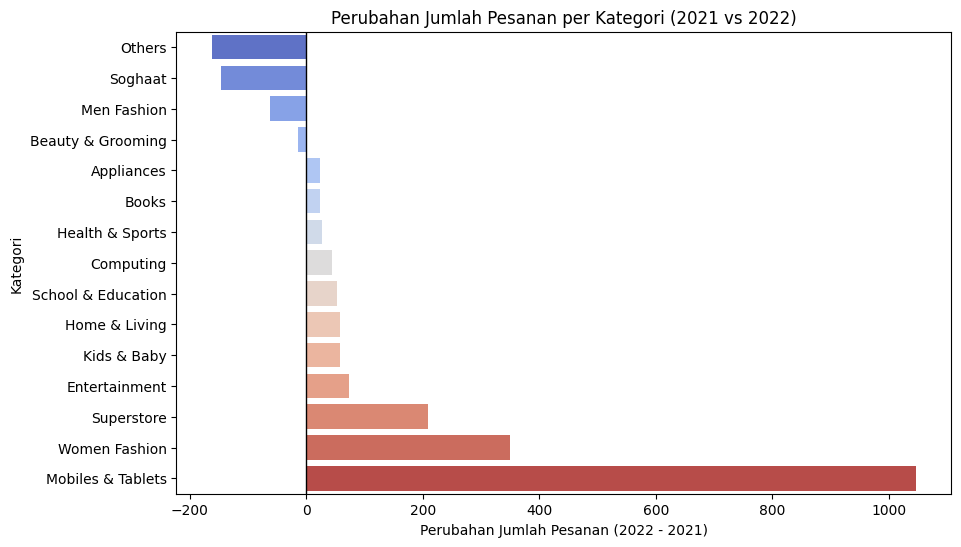

In [ ]:
#Membuat visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Mengurutkan data berdasarkan qty_diff
data2_merge = data2_merge.sort_values("qty_diff", ascending=True)

# Plot horizontal bar chart
plt.figure(figsize=(10, 6))
sns.barplot(
    data=data2_merge,
    x="qty_diff",
    y="category",
    palette="coolwarm"
)

# Menambahkan label dan judul
plt.axvline(0, color='black', linewidth=1)  # Garis tengah di nol
plt.xlabel("Perubahan Jumlah Pesanan (2022 - 2021)")
plt.ylabel("Kategori")
plt.title("Perubahan Jumlah Pesanan per Kategori (2021 vs 2022)")

# Menampilkan plot
plt.show()


## `Jawaban No 2.2`

In [ ]:
#Memfilter Data Valid untuk Kategori "Others"
valid_data = df[(df["is_valid"] == 1) & (df["category"] == "Others")]
#Mengelompokkan Data Tahun 2021
others_21 = valid_data[valid_data["order_date"].dt.year == 2021].groupby("sku_name")["qty_ordered"].sum().reset_index(name="qty_2021")
#Mengelompokkan Data Tahun 2022
others_22 = valid_data[valid_data["order_date"].dt.year == 2022].groupby("sku_name")["qty_ordered"].sum().reset_index(name="qty_2022")
#Menggabungkan Data Tahun 2021 dan 2022
others_merge = pd.merge(others_21, others_22, on="sku_name", how="outer").fillna(0)
#Menghitung Selisih Jumlah Pesanan
others_merge["qty_diff"] = others_merge["qty_2022"] - others_merge["qty_2021"]
#Menampilkan 20 SKU dengan Penurunan Terbesar
others_merge.nsmallest(20, "qty_diff")


,sku_name,qty_2021,qty_2022,qty_diff
69,RB_Dettol Germ Busting Kit-bf,200.0,45.0,-155.0
18,Dawlance_MD 10 + DWB 600,23.0,0.0,-23.0
84,Telemall_MM-DR-HB-L,23.0,2.0,-21.0
137,iu_Tickets General Enclosure-Islamabad,20.0,0.0,-20.0
70,RS_Rehmat-e-Shereen Mix Mithai,13.0,0.0,-13.0
141,kansai_NeverWet,10.0,1.0,-9.0
154,sindbad_Sindbad Gift Card-3,7.0,0.0,-7.0
133,emart_00-1,7.0,1.0,-6.0
4,Am-PTV_ATS-004-M,5.0,0.0,-5.0
93,Vouch 365 2016,5.0,0.0,-5.0


<ipython-input-27-721bd7bf8201>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


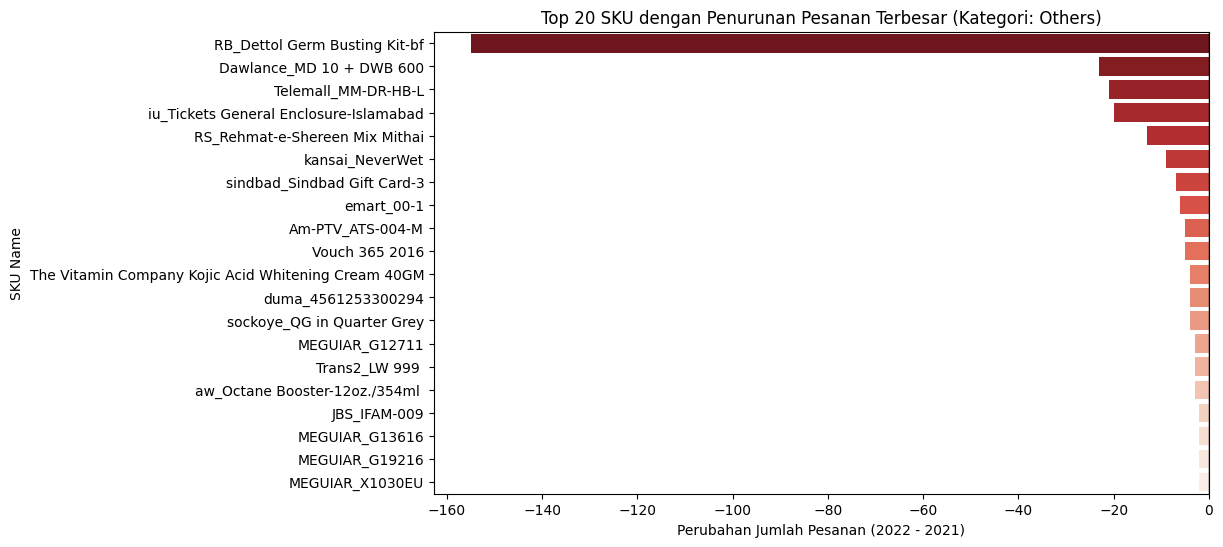

In [ ]:
#Membuat visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Mengambil 20 SKU dengan penurunan terbesar
top_decline_sku = others_merge.nsmallest(20, "qty_diff")

# Membuat horizontal bar chart
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_decline_sku,
    x="qty_diff",
    y="sku_name",
    palette="Reds_r"  # Warna merah menunjukkan penurunan
)

# Menambahkan label dan judul
plt.axvline(0, color='black', linewidth=1)  # Garis tengah di nol
plt.xlabel("Perubahan Jumlah Pesanan (2022 - 2021)")
plt.ylabel("SKU Name")
plt.title("Top 20 SKU dengan Penurunan Pesanan Terbesar (Kategori: Others)")

# Menampilkan plot
plt.show()


## `No 3`
**Dear Data Analyst**,
<br></br>
Terkait ulang tahun perusahaan pada 2 bulan mendatang, Tim Digital Marketing akan memberikan informasi promo bagi pelanggan pada akhir bulan ini. Kriteria pelanggan yang akan kami butuhkan adalah mereka yang sudah melakukan check-out namun belum melakukan pembayaran (is_gross = 1) selama tahun 2022. Data yang kami butuhkan adalah ID Customer dan Registered Date.

Mohon bantuan, untuk mengirimkan data tersebut sebelum akhir bulan ini ke Tim Digital Marketing. Atas bantuan yang diberikan, kami mengucapkan terima kasih.
<br></br>
Regards

**Tim Digital Marketing**

<details><summary>Klik di sini untuk tips</summary>


```python
1. Memfilter data dengan gross = 1
2. Memfilter data dengan valid = 0
3. Memfilter data dengan net = 0
4. Memfilter data pada transaksi selama 2022


```



</details>

## `Jawaban No 3`

In [ ]:
# Tulis kode Anda di bawah ini. Dapat menggunakan lebih dari 1 blok kode (punya kak lorenzo)
data3 = df[(df['is_gross']==1) & (df['is_valid']==0) & (df['is_net']==0) & (df['order_date'].dt.year == 2022)]
data3 = data3[['customer_id','registered_date']].sort_values(['registered_date'],ascending=True)
data3 = data3.drop_duplicates(subset=['customer_id'])
data3


,customer_id,registered_date
4168,C349980L,2021-07-02
3021,C849967L,2021-07-02
1304,C378684L,2021-07-03
606,C831683L,2021-07-03
1331,C893754L,2021-07-03
...,...,...
2335,C877563L,2022-08-24
157,C788348L,2022-08-25
3512,C741725L,2022-08-25
315,C925840L,2022-08-28


In [ ]:
data3 = df.query("is_gross == 1 and is_valid == 0 and is_net == 0 and order_date.dt.year == 2022")
data3 = data3.loc[:, ["customer_id", "registered_date"]].drop_duplicates("customer_id").sort_values("registered_date")
data3


,customer_id,registered_date
3021,C849967L,2021-07-02
4168,C349980L,2021-07-02
100,C831683L,2021-07-03
1331,C893754L,2021-07-03
1304,C378684L,2021-07-03
...,...,...
2335,C877563L,2022-08-24
3512,C741725L,2022-08-25
157,C788348L,2022-08-25
443,C466867L,2022-08-28


In [ ]:
#Jalankan kode ini untuk mendownload file
from google.colab import files
data3.to_csv('audience_list.csv', encoding = 'utf-8-sig',index=False) #ganti [nama variabel file] dengan nama variabel yang digunakan
files.download('audience_list.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#Jalankan kode ini untuk mendownload file
from google.colab import files

# Simpan data ke file CSV dan unduh
filename = "audience_list.csv"
data3.to_csv(filename, encoding="utf-8-sig", index=False)
files.download(filename)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## `No 4`
**Dear Data Analyst**,
<br></br>
Pada bulan October hingga Desember 2022, kami melakukan campaign setiap hari Sabtu dan Minggu. Kami hendak menilai, apakah campaign tersebut cukup berdampak pada kenaikan penjualan (before_discount). Mohon bantuan untuk menampilkan data:
1. Rata-rata harian penjualan weekends (Sabtu dan Minggu) vs rata-rata harian penjualan weekdays (Senin-Jumat) per bulan tersebut. Apakah ada peningkatan penjualan pada masing-masing bulan tersebut.
2. Rata-rata harian penjualan weekends (Sabtu dan Minggu) vs rata-rata harian penjualan weekdays (Senin-Jumat) keseluruhan 3 bulan tersebut.

Mohon bantuan untuk mengirimkan data tersebut paling lambat minggu depan. Atas bantuan yang diberikan, kami mengucapkan terima kasih.
<br></br>
Regards

**Tim Campaign**

<details><summary>Klik di sini untuk tips</summary>


```python
1. Buatlah kolom baru untuk day, month, dan month number
2. Memfilter data dengan valid = 1
3. Memfilter data dengan day termasuk 'Saturday', 'Sunday' dengan menggunakan fungsi isin dan simpan dalam variable 'weekends'
4. Memfilter data dengan day termasuk 'Monday','Tuesday','Wednesday','Thusday','Friday' dengan menggunakan fungsi isin dan simpan dengan variabel 'weekday'
5. Memfilter data pada transaksi selama 2022 bulan Oktober sampai dengan Desember
6. Gunakan groupby berdasarkan pada masing-masing variabel
7. Menggabungkan kedua data dengan merge
8. Tampilkan pada grafik batang untuk melihat perbedaananya


```



</details>

## `Jawaban No 4.1`

In [ ]:
# Tulis kode Anda di bawah ini. Dapat menggunakan lebih dari 1 blok kode
# Menambahkan kolom baru untuk day, month, dan month number
df['day'] = df['order_date'].dt.day_name()
df['month'] = df['order_date'].dt.month_name()
df['month_number'] = df['order_date'].dt.month

In [ ]:
# Memfilter data dengan valid = 1
df_valid = df[df['is_valid'] == 1]

In [ ]:
# Memfilter data pada transaksi selama Oktober - Desember 2022
df_valid = df_valid[(df_valid['month_number'].isin([10, 11, 12])) & (df_valid['order_date'].dt.year == 2022)]

In [ ]:
# Memfilter data berdasarkan hari
weekends = df_valid[df_valid['day'].isin(['Saturday', 'Sunday'])]
weekdays = df_valid[df_valid['day'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])]

In [ ]:
# Mengelompokkan data dan menghitung rata-rata transaksi
weekend_grouped = weekends.groupby('month')['before_discount'].mean().reset_index(name='avg_weekend')
weekday_grouped = weekdays.groupby('month')['before_discount'].mean().reset_index(name='avg_weekday')

In [ ]:
# Menggabungkan kedua data
data_summary = pd.merge(weekend_grouped, weekday_grouped, on='month', how='outer')
data_summary['growth'] = data_summary['avg_weekend'] - data_summary['avg_weekday']

<Figure size 1200x700 with 0 Axes>

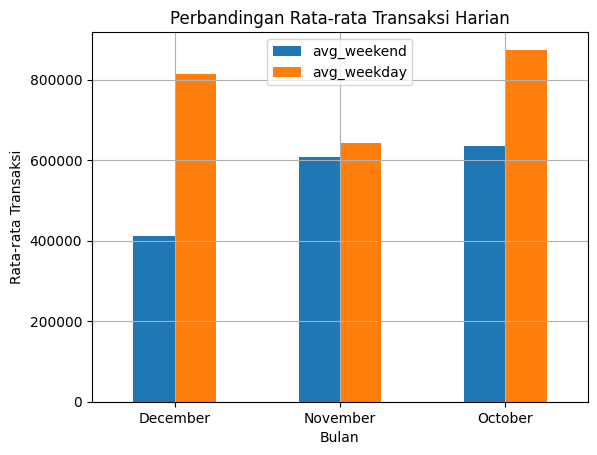

In [ ]:
# Visualisasi perbedaan transaksi
plt.figure(figsize=(12,7))
data_summary.set_index('month')[['avg_weekend', 'avg_weekday']].plot(kind='bar')
plt.title('Perbandingan Rata-rata Transaksi Harian')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Transaksi')
plt.grid(True)
plt.xticks(rotation=0)
plt.show()

## `Jawaban No 4.2`

In [ ]:
# Rata-rata keseluruhan 3 bulan
overall_avg_sales = {
    'periode': 'Total 3 Bulan',
    'avg_sales_weekend': weekends['before_discount'].mean().round(2),
    'avg_sales_weekday': weekdays['before_discount'].mean().round(2)
}
overall_avg_df = pd.DataFrame([overall_avg_sales])
overall_avg_df['growth'] = overall_avg_df['avg_sales_weekend'] - overall_avg_df['avg_sales_weekday']
overall_avg_df['percentage_growth'] = ((overall_avg_df['growth'] / overall_avg_df['avg_sales_weekday']) * 100).round(2)
overall_avg_df


,periode,avg_sales_weekend,avg_sales_weekday,growth,percentage_growth
0,Total 3 Bulan,558865.15,770146.01,-211280.86,-27.43
